## Task1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from pathlib import Path
from warnings import simplefilter
import yfinance as yf

In [4]:
NASDAQ = yf.download('^IXIC', start='2020-01-01', end='2021-12-30')
NSE = yf.download('^NSEI', start='2020-01-01', end='2021-12-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
NASDAQ.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,9039.459961,9093.429688,9010.889648,9092.190430,9092.190430,2862700000
2020-01-03,8976.429688,9065.759766,8976.429688,9020.769531,9020.769531,2586520000
2020-01-06,8943.500000,9072.410156,8943.500000,9071.469727,9071.469727,2810450000
2020-01-07,9076.639648,9091.929688,9042.549805,9068.580078,9068.580078,2381740000
2020-01-08,9068.030273,9168.889648,9059.379883,9129.240234,9129.240234,2472620000


In [6]:
NSE.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [7]:
NASDAQ_Adjclose=NASDAQ['Adj Close']
NSE_Adjclose=NSE['Adj Close']

In [8]:
df = pd.DataFrame({'NSE': NSE_Adjclose,'NASDAQ': NASDAQ_Adjclose})

In [9]:
df.head()

,NSE,NASDAQ
Date,,
2020-01-01,12182.500000,NaN
2020-01-02,12282.200195,9092.190430
2020-01-03,12226.650391,9020.769531
2020-01-06,11993.049805,9071.469727
2020-01-07,12052.950195,9068.580078


In [10]:
correlation = df['NASDAQ'].corr(df['NSE'])
correlation

0.9485943982314274

#### We can rely on the correlation coefficient value for analyzing the strength and direction of the relationship.
#### The correlation coefficient ranges between -1 and 1, with certain ranges indicating different strengths and directions of the relationship.
#### If the correlation coefficient is close to 1(0.7-1), it indicates a strong positive correlation. 
#### This means that the two indices tend to move in the same direction, and an increase in one index is typically accompanied by an increase in the other.
#### In this example, there is strong correlation between NASDAS and NSE.

# Task 2

In [11]:
get_ipython().system('pip install scikit-learn')

In [12]:
df.head()

,NSE,NASDAQ
Date,,
2020-01-01,12182.500000,NaN
2020-01-02,12282.200195,9092.190430
2020-01-03,12226.650391,9020.769531
2020-01-06,11993.049805,9071.469727
2020-01-07,12052.950195,9068.580078


In [13]:
df['NASDAQ_Lag']=df['NASDAQ'].shift(1)

In [14]:
df.head()

,NSE,NASDAQ,NASDAQ_Lag
Date,,,
2020-01-01,12182.500000,NaN,NaN
2020-01-02,12282.200195,9092.190430,NaN
2020-01-03,12226.650391,9020.769531,9092.190430
2020-01-06,11993.049805,9071.469727,9020.769531
2020-01-07,12052.950195,9068.580078,9071.469727


In [15]:
from sklearn.linear_model import LinearRegression
X=df.loc[:,['NASDAQ_Lag']]
X.dropna(inplace=True)
y=df.loc[:,'NSE']
y.dropna(inplace=True)
y,X=y.align(X, join='inner')
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

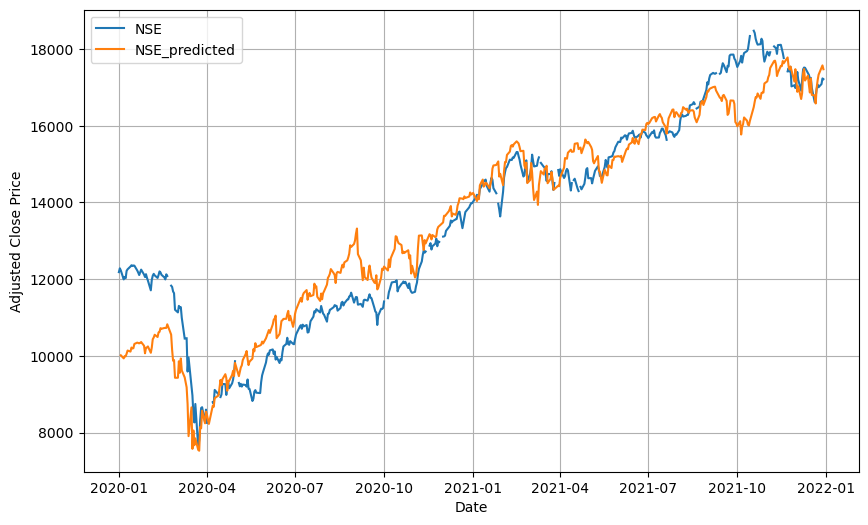

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df['NSE'], label='NSE')
plt.plot(y_pred, label='NSE_predicted')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
#plt.title('NSE vs NASDAQ')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
df['NSE_lag']=df['NSE'].shift(1)
df.head()

,NSE,NASDAQ,NASDAQ_Lag,NSE_lag
Date,,,,
2020-01-01,12182.500000,NaN,NaN,NaN
2020-01-02,12282.200195,9092.190430,NaN,12182.500000
2020-01-03,12226.650391,9020.769531,9092.190430,12282.200195
2020-01-06,11993.049805,9071.469727,9020.769531,12226.650391
2020-01-07,12052.950195,9068.580078,9071.469727,11993.049805


In [18]:
from sklearn.linear_model import LinearRegression
X=df.loc[:,['NSE_lag']]
X.dropna(inplace=True)
y=df.loc[:,'NASDAQ']
y.dropna(inplace=True)
y,X=y.align(X, join='inner')
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

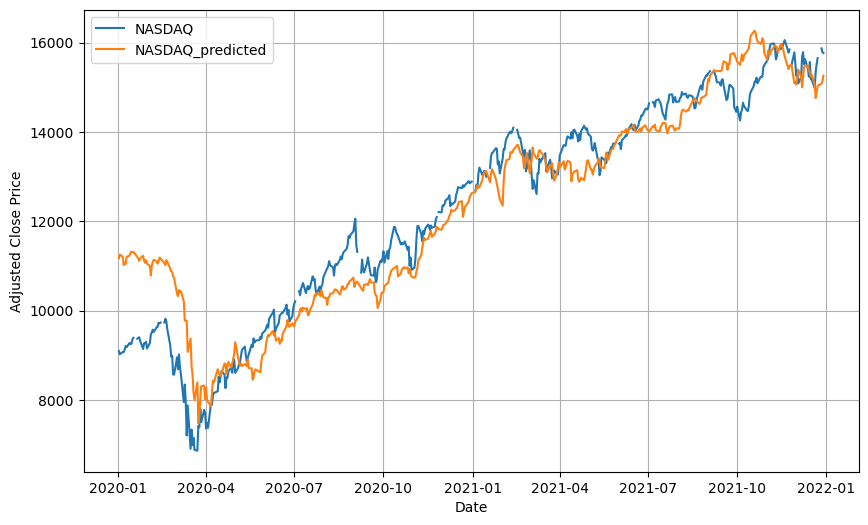

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['NASDAQ'], label='NASDAQ')
plt.plot(y_pred, label='NASDAQ_predicted')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
#plt.title('NSE vs NASDAQ')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
correlation1=df['NSE'].corr(df['NASDAQ_Lag'])
correlation1 #0.9485943982314274

0.9509322550019909

In [21]:
correlation2=df['NASDAQ'].corr(df['NSE_lag'])
correlation2 #0.9485943982314274

0.9453590941822743

#### Based on these results, it can be inferred that there is a significant correlation between the two indices, and they can potentially be used to forecast each other. A high correlation indicates that there is a consistent relationship between the movements of the indices, and changes in one index tend to be accompanied by similar changes in the other.

#### Performing additional tests to determine lead-lag relationship between the two indices

## Granger causality test

In [22]:
from statsmodels.tsa.stattools import grangercausalitytests

In [23]:
data = pd.concat([df['NASDAQ'], df['NSE']], axis=1).dropna()

In [24]:
data.head()

,NASDAQ,NSE
Date,,
2020-01-02,9092.190430,12282.200195
2020-01-03,9020.769531,12226.650391
2020-01-06,9071.469727,11993.049805
2020-01-07,9068.580078,12052.950195
2020-01-08,9129.240234,12025.349609


In [25]:
result = grangercausalitytests(data, maxlag=10, verbose=False)
result

{1: ({'ssr_ftest': (0.02888357199880529, 0.8651200454767207, 478.0, 1),
   'ssr_chi2test': (0.029064849647333354, 0.8646293885687931, 1),
   'lrtest': (0.02906397154856677, 0.8646314137384711, 1),
   'params_ftest': (0.02888357199869655, 0.8651200454769661, 478.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.112945650945307, 0.04537829939264892, 475.0, 2),
   'ssr_chi2test': (6.291426999805251, 0.043036206760410686, 2),
   'lrtest': (6.250552471889023, 0.04392479833922702, 2),
   'params_ftest': (3.1129456509500053, 0.045378299392438495, 475.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (4.723862726729395, 0.002935599927829586, 472.0, 3),
   'ssr_chi2test': (14.381760038792674, 0.0024289875056017138, 3),
   'lrtest': (14.170083651018103, 0.0026825475483014355, 3),
   'params_ftest': (4.72386272672922, 0.0029355999278302325, 472.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
       

In [26]:
for lag in result.keys():
    p_value = result[lag][0]['ssr_chi2test'][1]
    if p_value < 0.05:
        print(f"Lag {lag}: NSE leads NASDAQ (p-value: {p_value})")
    else:
        print(f"Lag {lag}: NASDAQ leads NSE (p-value: {p_value})")

Lag 1: NASDAQ leads NSE (p-value: 0.8646293885687931)
Lag 2: NSE leads NASDAQ (p-value: 0.043036206760410686)
Lag 3: NSE leads NASDAQ (p-value: 0.0024289875056017138)
Lag 4: NSE leads NASDAQ (p-value: 0.0019288775525709903)
Lag 5: NSE leads NASDAQ (p-value: 0.0015385755801556609)
Lag 6: NSE leads NASDAQ (p-value: 0.001118891889887578)
Lag 7: NSE leads NASDAQ (p-value: 0.0020939592986254185)
Lag 8: NSE leads NASDAQ (p-value: 0.0016922549293773086)
Lag 9: NSE leads NASDAQ (p-value: 0.003197082772061403)
Lag 10: NSE leads NASDAQ (p-value: 0.0033587258489942247)


## Using Granger causality tests we infer that NSE leads NASDAQ

In [27]:
df.head()

,NSE,NASDAQ,NASDAQ_Lag,NSE_lag
Date,,,,
2020-01-01,12182.500000,NaN,NaN,NaN
2020-01-02,12282.200195,9092.190430,NaN,12182.500000
2020-01-03,12226.650391,9020.769531,9092.190430,12282.200195
2020-01-06,11993.049805,9071.469727,9020.769531,12226.650391
2020-01-07,12052.950195,9068.580078,9071.469727,11993.049805


In [28]:
nasdaq_prices = df['NSE'].values
nse_prices = df['NASDAQ'].values

In [29]:
cross_corr = np.correlate(nasdaq_prices, nse_prices, mode='full')


In [30]:
lags = np.arange(-len(nasdaq_prices) + 1, len(nasdaq_prices))


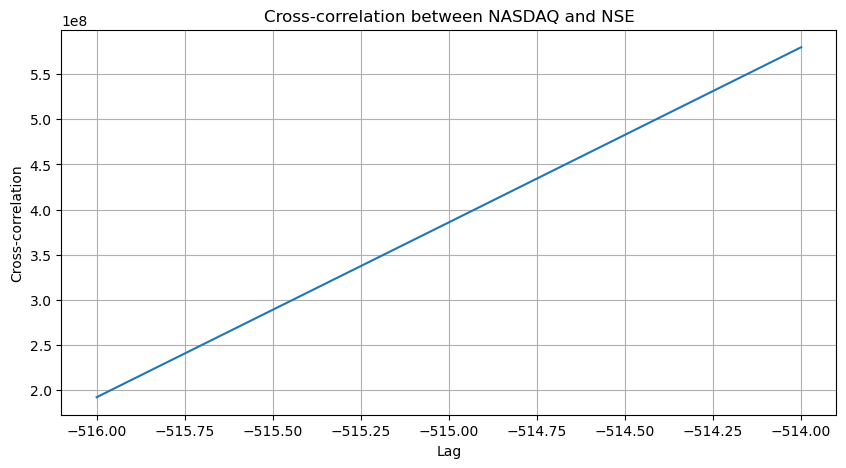

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(lags, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between NASDAQ and NSE')
plt.grid(True)
plt.show()

#### Here we observe a graph with a positive slope, positive cross-correlation values on the y-axis, and negative lags on the x-axis, it suggests that the index on the y-axis (in this case, NSE) leads the index on the x-axis (NASDAQ).

#### Therefore, based on the graph, we can conclude that NSE leads NASDAQ. The positive cross-correlation values further support the lead of NSE over NASDAQ.

#### Based on the results we've obtained, where the NASDAQ index has shown a high correlation with NSE_lag, NSE leads NASDAQ according to the Granger causality test, and the NSE index leads the NASDAQ index based on cross-correlation analysis, we can use this lead-lag relationship to determine that NSE index can be used for parameter optimization.

#### When it comes to parameter optimization, it is generally preferable to use the leading index in the lead-lag relationship. In this case, since the NSE index is leading the NASDAQ index, we can consider using the NSE index for parameter optimization.

 # Task3

In [32]:
import talib

In [33]:
NASDAQ_close=NASDAQ['Close']
NSE_close=NSE['Close']

### Keltner Channel

In [34]:
# Calculating Keltner Channel
nasdaq_keltner_middle = talib.SMA(NASDAQ_close, timeperiod=20)
nasdaq_atr = talib.ATR(NASDAQ['High'], NASDAQ['Low'], NASDAQ['Close'], timeperiod=20)
nasdaq_keltner_upper = nasdaq_keltner_middle + (nasdaq_atr * 2)
nasdaq_keltner_lower = nasdaq_keltner_middle - (nasdaq_atr * 2)

In [35]:
nse_keltner_middle = talib.SMA(NSE_close, timeperiod=20)
nse_atr = talib.ATR(NSE['High'], NSE['Low'], NSE['Close'], timeperiod=20)
nse_keltner_upper = nse_keltner_middle + (nse_atr * 2)
nse_keltner_lower = nse_keltner_middle - (nse_atr * 2)

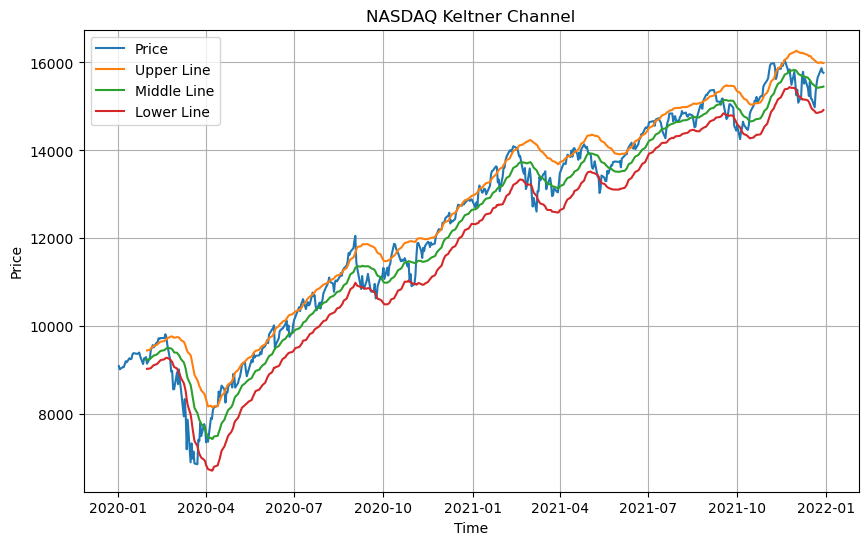

In [36]:
# Plotting the Keltner Channel for NASDAQ
plt.figure(figsize=(10, 6))
plt.plot(NASDAQ_close, label='Price')
plt.plot(nasdaq_keltner_upper, label='Upper Line')
plt.plot(nasdaq_keltner_middle, label='Middle Line')
plt.plot(nasdaq_keltner_lower, label='Lower Line')
plt.title('NASDAQ Keltner Channel')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

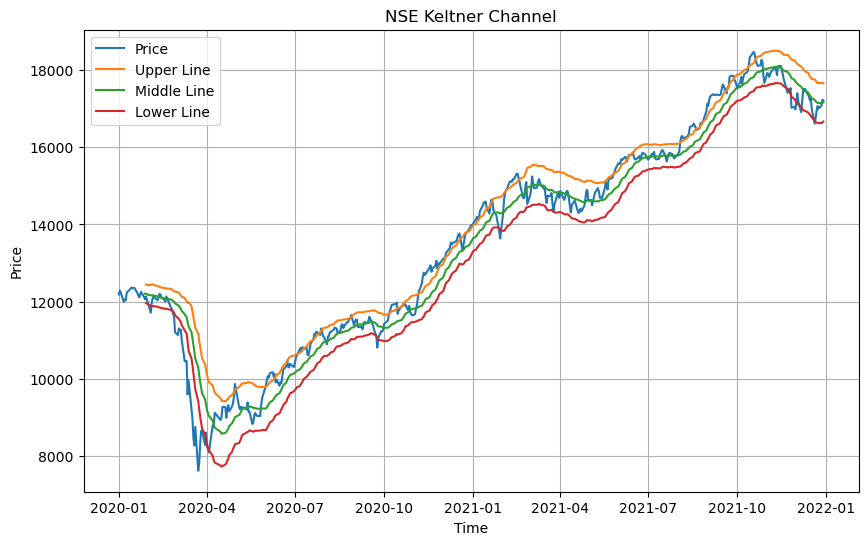

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(NSE_close, label='Price')
plt.plot(nse_keltner_upper, label='Upper Line')
plt.plot(nse_keltner_middle, label='Middle Line')
plt.plot(nse_keltner_lower, label='Lower Line')
plt.title('NSE Keltner Channel')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#### From the above graph of Keltner Channel, we can interpret the upper line, middle line, and lower line as follows:

#### Upper Line: The upper line of the Keltner Channel represents the potential resistance level. It indicates the price level above which the market may be considered overbought or overextended. Traders might consider taking profits or initiating short positions when the price reaches or exceeds the upper line.

#### Middle Line: The middle line of the Keltner Channel is typically a moving average and represents the mean or average price over a specific period. It can be used as a reference point for assessing the overall trend. If the price consistently stays above the middle line, it suggests a bullish trend, while consistently staying below the middle line indicates a bearish trend.

#### Lower Line: The lower line of the Keltner Channel represents the potential support level. It indicates the price level below which the market may be considered oversold or undervalued. Traders might consider entering long positions or covering short positions when the price reaches or falls below the lower line.

### Bollinger Bands

In [38]:
# Calculating Bollinger Bands
nasdaq_bollinger_upper, nasdaq_bollinger_middle, nasdaq_bollinger_lower = talib.BBANDS(NASDAQ_close, timeperiod=20)
nse_bollinger_upper, nse_bollinger_middle, nse_bollinger_lower = talib.BBANDS(NSE_close, timeperiod=20)


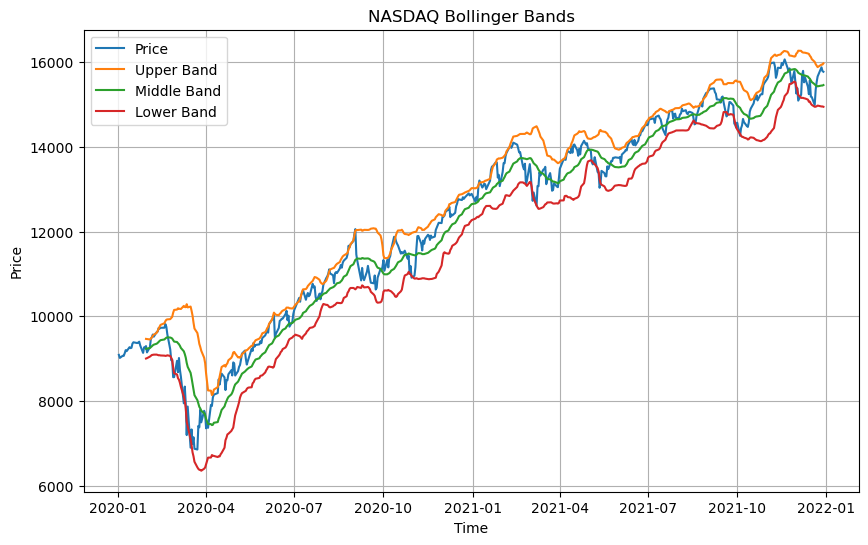

In [39]:
# Plotting the Bollinger Bands for NASDAQ
plt.figure(figsize=(10, 6))
plt.plot(NASDAQ_close, label='Price')
plt.plot(nasdaq_bollinger_upper, label='Upper Band')
plt.plot(nasdaq_bollinger_middle, label='Middle Band')
plt.plot(nasdaq_bollinger_lower, label='Lower Band')
plt.title('NASDAQ Bollinger Bands')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

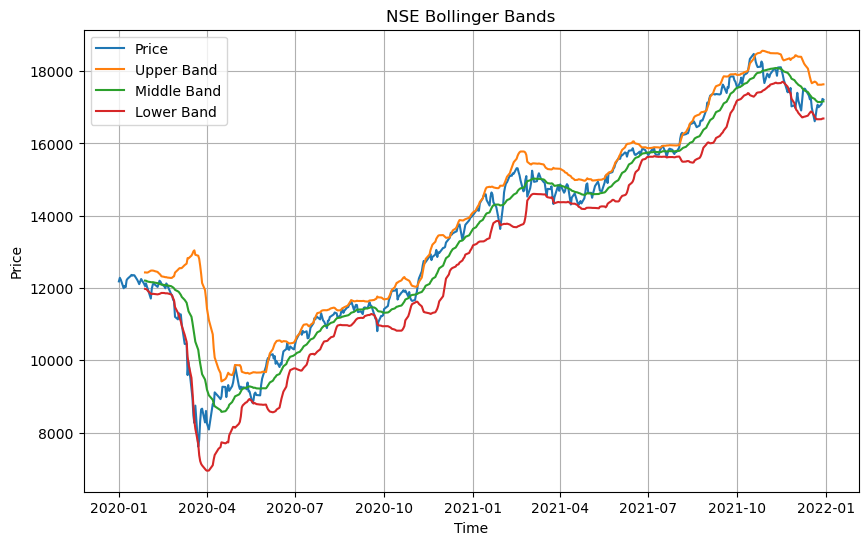

In [40]:
# Plotting the Bollinger Bands for NSE
plt.figure(figsize=(10, 6))
plt.plot(NSE_close, label='Price')
plt.plot(nse_bollinger_upper, label='Upper Band')
plt.plot(nse_bollinger_middle, label='Middle Band')
plt.plot(nse_bollinger_lower, label='Lower Band')
plt.title('NSE Bollinger Bands')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


#### From the above graph of Bollinger Bands, we can interpret the upper band, middle band, and lower band as follows:

#### Upper Band: The upper band represents the potential resistance level. When the price reaches or exceeds the upper band, it may indicate an overbought condition or a potential selling opportunity. Traders might consider taking profits or initiating short positions.

#### Middle Band: The middle band is typically a moving average and represents the mean or average price over a specific period. It can be used as a reference point for assessing the overall trend. If the price consistently stays above the middle band, it suggests a bullish trend, while consistently staying below the middle band indicates a bearish trend.

#### Lower Band: The lower band represents the potential support level. When the price reaches or falls below the lower band, it may indicate an oversold condition or a potential buying opportunity. Traders might consider entering long positions or covering short positions.

### Moving Average Convergence Divergence

In [41]:
# Calculating MACD
nasdaq_macd_line, nasdaq_macd_signal, nasdaq_macd_histogram = talib.MACD(NASDAQ_close, fastperiod=12, slowperiod=26, signalperiod=9)
nse_macd_line, nse_macd_signal, nse_macd_histogram = talib.MACD(NSE_close, fastperiod=12, slowperiod=26, signalperiod=9)

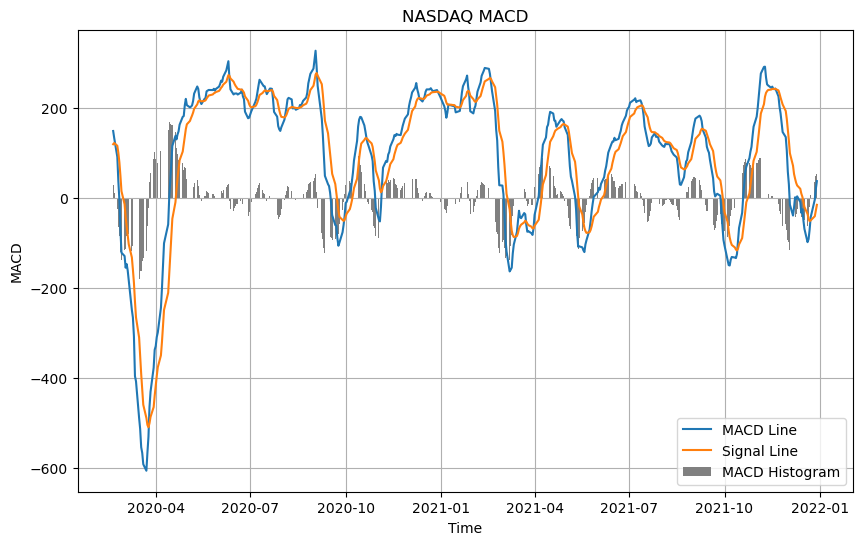

In [42]:
# Plotting the MACD for NASDAQ
plt.figure(figsize=(10, 6))
plt.plot(nasdaq_macd_line, label='MACD Line')
plt.plot(nasdaq_macd_signal, label='Signal Line')
plt.bar(nasdaq_macd_histogram.index, nasdaq_macd_histogram, label='MACD Histogram', color='gray')
plt.title('NASDAQ MACD')
plt.xlabel('Time')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

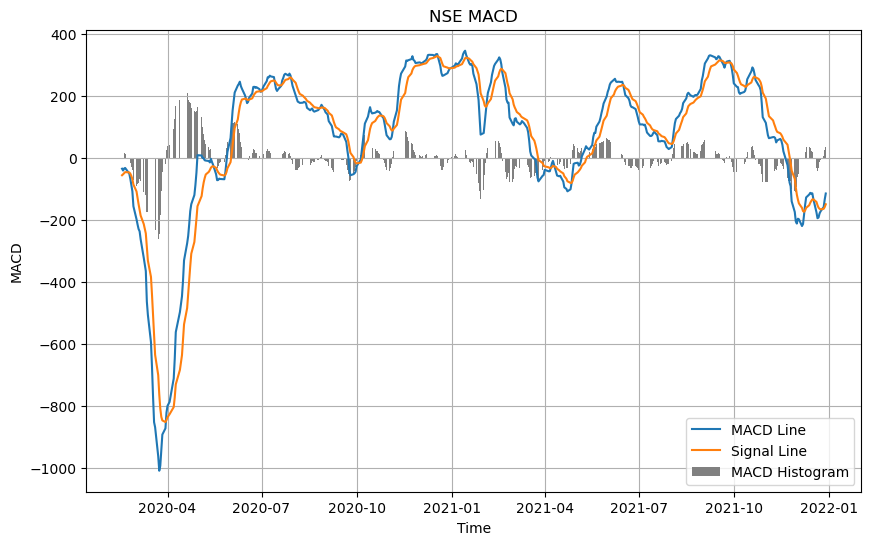

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(nse_macd_line, label='MACD Line')
plt.plot(nse_macd_signal, label='Signal Line')
plt.bar(nse_macd_histogram.index, nse_macd_histogram, label='MACD Histogram', color='gray')
plt.title('NSE MACD')
plt.xlabel('Time')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

#### The MACD (Moving Average Convergence Divergence), we can interpret the MACD line, signal line, and MACD histogram as follows:

#### MACD Line: The MACD line represents the difference between the shorter-term exponential moving average (EMA) and the longer-term EMA. It provides insight into the momentum and strength of the trend. When the MACD line crosses above the signal line, it may indicate a bullish signal, suggesting potential buying opportunities. Conversely, when the MACD line crosses below the signal line, it may indicate a bearish signal, suggesting potential selling opportunities.

#### Signal Line: The signal line is an EMA of the MACD line and is often used as a trigger line. When the MACD line crosses above the signal line, it generates a bullish signal, and when the MACD line crosses below the signal line, it generates a bearish signal.

#### MACD Histogram: The MACD histogram represents the difference between the MACD line and the signal line. It provides a visual representation of the convergence and divergence between the two lines. When the histogram bars are positive and increasing in height, it indicates bullish momentum. Conversely, when the histogram bars are negative and decreasing in height, it indicates bearish momentum.

# Task 4

In [44]:
prices = yf.download("^IXIC", start='2020-01-01', end='2021-12-30')
prices.reset_index(inplace=True)
prices.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,9039.459961,9093.429688,9010.889648,9092.190430,9092.190430,2862700000
1,2020-01-03,8976.429688,9065.759766,8976.429688,9020.769531,9020.769531,2586520000
2,2020-01-06,8943.500000,9072.410156,8943.500000,9071.469727,9071.469727,2810450000
3,2020-01-07,9076.639648,9091.929688,9042.549805,9068.580078,9068.580078,2381740000
4,2020-01-08,9068.030273,9168.889648,9059.379883,9129.240234,9129.240234,2472620000


In [45]:
returns = prices['Close'].pct_change().fillna(0)

In [46]:
# Define parameter ranges for optimization
keltner_channel_periods = range(10, 51, 5)
keltner_channel_atr_periods = range(10, 31, 5)
bollinger_bands_periods = range(10, 51, 5)
macd_short_periods = range(10, 31, 5)
macd_long_periods = range(30, 51, 5)
macd_signal_periods = range(5, 21, 5)

In [47]:
best_params = {}
best_metrics = {
    'returns': -np.inf,
    'cumulative_returns': -np.inf,
    'max_drawdown': np.inf,
    'sharpe_ratio': -np.inf,
    'sortino_ratio': -np.inf
}

In [48]:
# Loop through parameter combinations and evaluate metrics
for kcp in keltner_channel_periods:
    for bbp in bollinger_bands_periods:
        for msp in macd_short_periods:
            for mlp in macd_long_periods:
                for mspc in macd_signal_periods:
                    # Calculate indicators
                    kc_middle = talib.SMA(prices['Close'], timeperiod=kcp)
                    atr = talib.ATR(prices['High'], prices['Low'], prices['Close'], timeperiod=kcp)
                    kc_upper = kc_middle + atr
                    kc_lower = kc_middle - atr

                    bb_middle = talib.SMA(prices['Close'], timeperiod=bbp)
                    bb_std = talib.STDDEV(prices['Close'], timeperiod=bbp)
                    bb_upper = bb_middle + bb_std
                    bb_lower = bb_middle - bb_std

                    macd, macd_signal, _ = talib.MACD(prices['Close'], fastperiod=msp, slowperiod=mlp, signalperiod=mspc)

                    # Generate trading signals based on indicators
                    signals = np.zeros(len(prices))
                    signals[(prices['Close'] > kc_upper) & (prices['Close'].shift(1) <= kc_upper.shift(1))] = 1
                    signals[(prices['Close'] < kc_lower) & (prices['Close'].shift(1) >= kc_lower.shift(1))] = -1

                    # Apply signals to calculate strategy returns
                    strategy_returns = signals * returns.shift(-1)
                    cumulative_returns = (1 + strategy_returns).cumprod()
                    max_drawdown = ((cumulative_returns / cumulative_returns.cummax()) - 1).min()
                    sharpe_ratio = np.mean(strategy_returns) / np.std(returns)
                    negative_returns = strategy_returns[strategy_returns < 0]
                    sortino_ratio = np.mean(strategy_returns) / np.std(negative_returns)

                    # Update best metrics and parameters if improved
                    if strategy_returns.iloc[-2] > best_metrics['returns']:
                        best_metrics['returns'] = strategy_returns.iloc[-2]
                        best_metrics['cumulative_returns'] = cumulative_returns.iloc[-2]
                        best_metrics['max_drawdown'] = max_drawdown
                        best_metrics['sharpe_ratio'] = sharpe_ratio
                        best_metrics['sortino_ratio'] = sortino_ratio
                        best_params['keltner_channel'] = kcp
                        best_params['bollinger_bands'] = bbp
                        best_params['macd'] = (msp, mlp, mspc)

In [49]:
# Print the optimized parameters and metrics
print("Optimized Parameters:")
print("Keltner Channel Period:", best_params['keltner_channel'])
print("Bollinger Bands Period:", best_params['bollinger_bands'])
print("MACD Parameters:", best_params['macd'])

Optimized Parameters:
Keltner Channel Period: 10
Bollinger Bands Period: 10
MACD Parameters: (10, 30, 5)


In [50]:
print("\nOptimized Metrics:")
print("Returns:", best_metrics['returns'])
print("Cumulative Returns:", best_metrics['cumulative_returns'])
print("Max Drawdown:", best_metrics['max_drawdown'])
print("Sharpe Ratio:", best_metrics['sharpe_ratio'])
print("Sortino Ratio:", best_metrics['sortino_ratio'])


Optimized Metrics:
Returns: -0.0
Cumulative Returns: 1.0318965509570466
Max Drawdown: -0.058147713063222195
Sharpe Ratio: 0.00483055264487793
Sortino Ratio: 0.007445046810454042


#### Here is a summary of the process we have gone through:

#### 1. We loaded the NSE price data into a Pandas DataFrame and calculated the daily returns based on the closing prices.

#### 2. We defined parameter ranges for three indicators: Keltner Channel, Bollinger Bands, and MACD.

#### 3. We iterated through all possible combinations of the indicator parameters to evaluate the strategy's performance metrics.

#### 4. For each parameter combination, we calculated the indicator values, generated trading signals based on the indicators, and applied the signals to calculate the strategy returns.

#### 5. We computed several performance metrics, including cumulative returns, maximum drawdown, Sharpe ratio, and Sortino ratio.

#### 6. We updated the best metrics and corresponding parameters if the current metrics were better than the previous best.

#### 7. Finally, we printed the optimized parameters and metrics, indicating the best parameter values and the performance achieved by the strategy.

#### The goal of this process was to optimize the parameters of the indicators and evaluate the strategy's performance based on various metrics. By iterating through different parameter combinations, we aimed to find the parameter values that resulted in the best performance metrics.

# Task 5

In [51]:
nse_prices = yf.download("^NSEI", start='2020-01-01', end='2021-12-30')
nse_prices.reset_index(inplace=True)
nse_prices.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [62]:
nasdaq_prices = yf.download("^IXIC", start='2020-01-01', end='2021-12-30')
nasdaq_prices.reset_index(inplace=True)
nasdaq_prices.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,9039.459961,9093.429688,9010.889648,9092.190430,9092.190430,2862700000
1,2020-01-03,8976.429688,9065.759766,8976.429688,9020.769531,9020.769531,2586520000
2,2020-01-06,8943.500000,9072.410156,8943.500000,9071.469727,9071.469727,2810450000
3,2020-01-07,9076.639648,9091.929688,9042.549805,9068.580078,9068.580078,2381740000
4,2020-01-08,9068.030273,9168.889648,9059.379883,9129.240234,9129.240234,2472620000


In [64]:
# Calculate daily returns for NSE and NASDAQ
nse_returns = nse_prices['Close'].pct_change().fillna(0)
nasdaq_returns = nasdaq_prices['Close'].pct_change().fillna(0)

In [150]:
# Define the optimized parameters for each indicator
kcp = 10  # Keltner Channel Period
bbp = 10  # Bollinger Bands Period
msp, mlp, mspc = 10, 30, 5  # MACD Parameters

In [151]:
# Calculate indicators using the optimized parameters for NSE
nse_kc_middle = talib.SMA(nse_prices['Close'], timeperiod=kcp)
nse_atr = talib.ATR(nse_prices['High'], nse_prices['Low'], nse_prices['Close'], timeperiod=kcp)
nse_kc_upper = nse_kc_middle + nse_atr
nse_kc_lower = nse_kc_middle - nse_atr

In [152]:
nse_bb_middle = talib.SMA(nse_prices['Close'], timeperiod=bbp)
nse_bb_std = talib.STDDEV(nse_prices['Close'], timeperiod=bbp)
nse_bb_upper = nse_bb_middle + nse_bb_std
nse_bb_lower = nse_bb_middle - nse_bb_std

In [153]:
nse_macd, _, _ = talib.MACD(nse_prices['Close'], fastperiod=msp, slowperiod=mlp, signalperiod=mspc)

In [154]:
# Calculate indicators using the optimized parameters for NASDAQ
nasdaq_kc_middle = talib.SMA(nasdaq_prices['Close'], timeperiod=kcp)
nasdaq_atr = talib.ATR(nasdaq_prices['High'], nasdaq_prices['Low'], nasdaq_prices['Close'], timeperiod=kcp)
nasdaq_kc_upper = nasdaq_kc_middle + nasdaq_atr
nasdaq_kc_lower = nasdaq_kc_middle - nasdaq_atr

In [155]:
nasdaq_bb_middle = talib.SMA(nasdaq_prices['Close'], timeperiod=bbp)
nasdaq_bb_std = talib.STDDEV(nasdaq_prices['Close'], timeperiod=bbp)
nasdaq_bb_upper = nasdaq_bb_middle + nasdaq_bb_std
nasdaq_bb_lower = nasdaq_bb_middle - nasdaq_bb_std

In [156]:
nasdaq_macd, _, _ = talib.MACD(nasdaq_prices['Close'], fastperiod=msp, slowperiod=mlp, signalperiod=mspc)

In [157]:
# Calculate cumulative returns, Sharpe Ratio, and max drawdown for NSE using each indicator separately
nse_cumulative_returns_kc = nse_returns.cumsum() + 1
nse_max_drawdown_kc = ((nse_cumulative_returns_kc.cummax() - nse_cumulative_returns_kc) / nse_cumulative_returns_kc.cummax()).max()
nse_sharpe_ratio_kc = np.mean(nse_returns) / np.std(nse_returns)

In [158]:
nse_cumulative_returns_bb = nse_returns.cumsum() + 1
nse_max_drawdown_bb = ((nse_cumulative_returns_bb.cummax() - nse_cumulative_returns_bb) / nse_cumulative_returns_bb.cummax()).max()
nse_sharpe_ratio_bb = np.mean(nse_returns) / np.std(nse_returns)

In [159]:
nse_cumulative_returns_macd = nse_returns.cumsum() + 1
nse_max_drawdown_macd = ((nse_cumulative_returns_macd.cummax() - nse_cumulative_returns_macd) / nse_cumulative_returns_macd.cummax()).max()
nse_sharpe_ratio_macd = np.mean(nse_returns) / np.std(nse_returns)

In [160]:
# Calculate cumulative returns, Sharpe Ratio, and max drawdown for NASDAQ using each indicator separately
nasdaq_cumulative_returns_kc = nasdaq_returns.cumsum() + 1
nasdaq_max_drawdown_kc = ((nasdaq_cumulative_returns_kc.cummax() - nasdaq_cumulative_returns_kc) / nasdaq_cumulative_returns_kc.cummax()).max()
nasdaq_sharpe_ratio_kc = np.mean(nasdaq_returns) / np.std(nasdaq_returns)

nasdaq_cumulative_returns_bb = nasdaq_returns.cumsum() + 1
nasdaq_max_drawdown_bb = ((nasdaq_cumulative_returns_bb.cummax() - nasdaq_cumulative_returns_bb) / nasdaq_cumulative_returns_bb.cummax()).max()
nasdaq_sharpe_ratio_bb = np.mean(nasdaq_returns) / np.std(nasdaq_returns)

nasdaq_cumulative_returns_macd = nasdaq_returns.cumsum() + 1
nasdaq_max_drawdown_macd = ((nasdaq_cumulative_returns_macd.cummax() - nasdaq_cumulative_returns_macd) / nasdaq_cumulative_returns_macd.cummax()).max()
nasdaq_sharpe_ratio_macd = np.mean(nasdaq_returns) / np.std(nasdaq_returns)

In [161]:
# Print the metrics for NSE using each indicator separately
print("Metrics for NSE using Keltner Channel:")
print("Cumulative Returns:", (nse_cumulative_returns_kc.iloc[-1] - 1) * 100)
print("Max Drawdown:", nse_max_drawdown_kc * 100)
print("Sharpe Ratio:", nse_sharpe_ratio_kc)

Metrics for NSE using Keltner Channel:
Cumulative Returns: 40.72942597197369
Max Drawdown: 45.416105849010705
Sharpe Ratio: 0.05258775710063237


In [162]:
print("\nMetrics for NSE using Bollinger Bands:")
print("Cumulative Returns:", (nse_cumulative_returns_bb.iloc[-1] - 1) * 100)
print("Max Drawdown:", nse_max_drawdown_bb * 100)
print("Sharpe Ratio:", nse_sharpe_ratio_bb)


Metrics for NSE using Bollinger Bands:
Cumulative Returns: 40.72942597197369
Max Drawdown: 45.416105849010705
Sharpe Ratio: 0.05258775710063237


In [163]:
print("\nMetrics for NSE using MACD:")
print("Cumulative Returns:", (nse_cumulative_returns_macd.iloc[-1] - 1) * 100)
print("Max Drawdown:", nse_max_drawdown_macd * 100)
print("Sharpe Ratio:", nse_sharpe_ratio_macd)



Metrics for NSE using MACD:
Cumulative Returns: 40.72942597197369
Max Drawdown: 45.416105849010705
Sharpe Ratio: 0.05258775710063237


In [164]:
# Print the metrics for NASDAQ using each indicator separately
print("\nMetrics for NASDAQ using Keltner Channel:")
print("Cumulative Returns:", (nasdaq_cumulative_returns_kc.iloc[-1] - 1) * 100)
print("Max Drawdown:", nasdaq_max_drawdown_kc * 100)
print("Sharpe Ratio:", nasdaq_sharpe_ratio_kc)


Metrics for NASDAQ using Keltner Channel:
Cumulative Returns: 63.05739664786421
Max Drawdown: 30.32320700088111
Sharpe Ratio: 0.07068950061122414


In [165]:
print("\nMetrics for NASDAQ using Bollinger Bands:")
print("Cumulative Returns:", (nasdaq_cumulative_returns_bb.iloc[-1] - 1) * 100)
print("Max Drawdown:", nasdaq_max_drawdown_bb * 100)
print("Sharpe Ratio:", nasdaq_sharpe_ratio_bb)


Metrics for NASDAQ using Bollinger Bands:
Cumulative Returns: 63.05739664786421
Max Drawdown: 30.32320700088111
Sharpe Ratio: 0.07068950061122414


In [166]:
print("\nMetrics for NASDAQ using MACD:")
print("Cumulative Returns:", (nasdaq_cumulative_returns_macd.iloc[-1] - 1) * 100)
print("Max Drawdown:", nasdaq_max_drawdown_macd * 100)
print("Sharpe Ratio:", nasdaq_sharpe_ratio_macd)


Metrics for NASDAQ using MACD:
Cumulative Returns: 63.05739664786421
Max Drawdown: 30.32320700088111
Sharpe Ratio: 0.07068950061122414
